In [1]:
import numpy as np
import pandas as pd

## normalization  

- more info: https://www.codecademy.com/articles/normalization

<div>
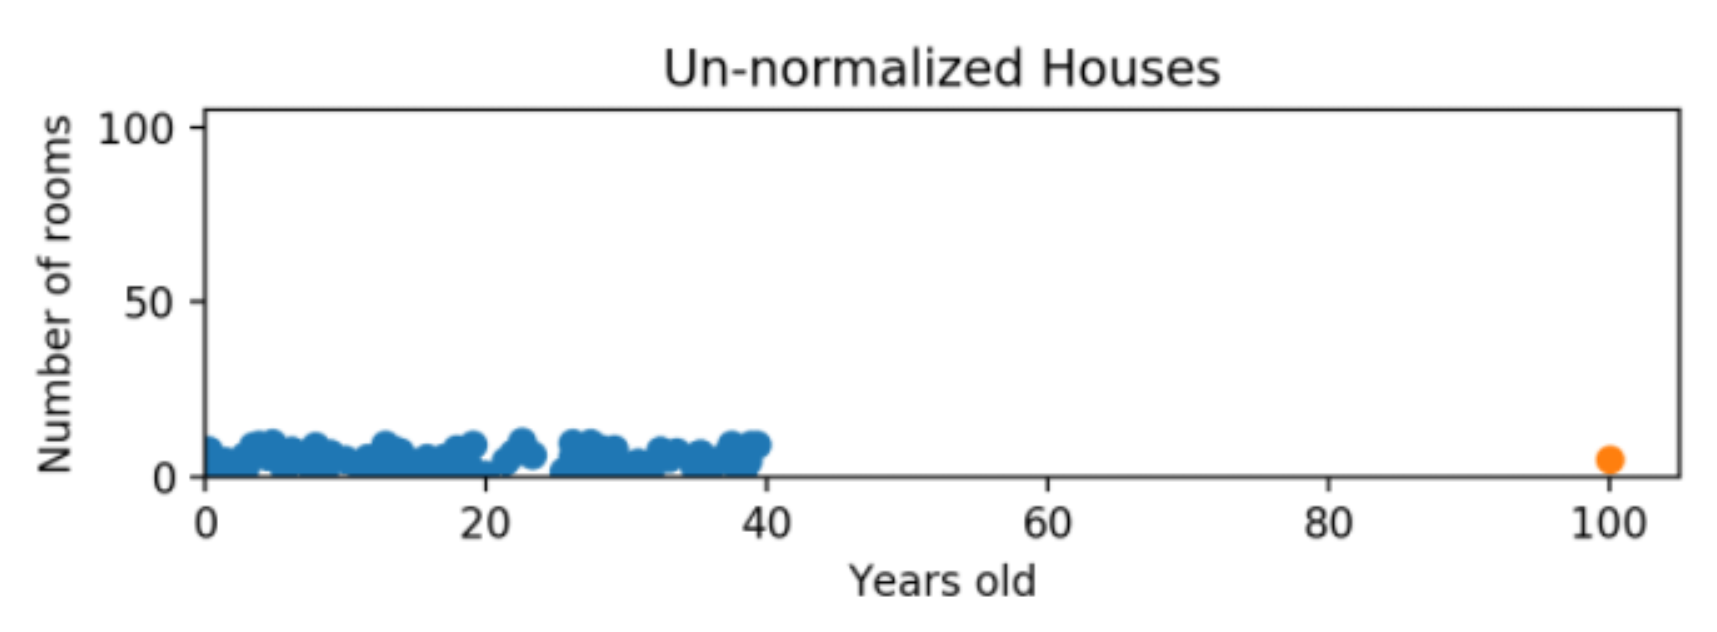
    
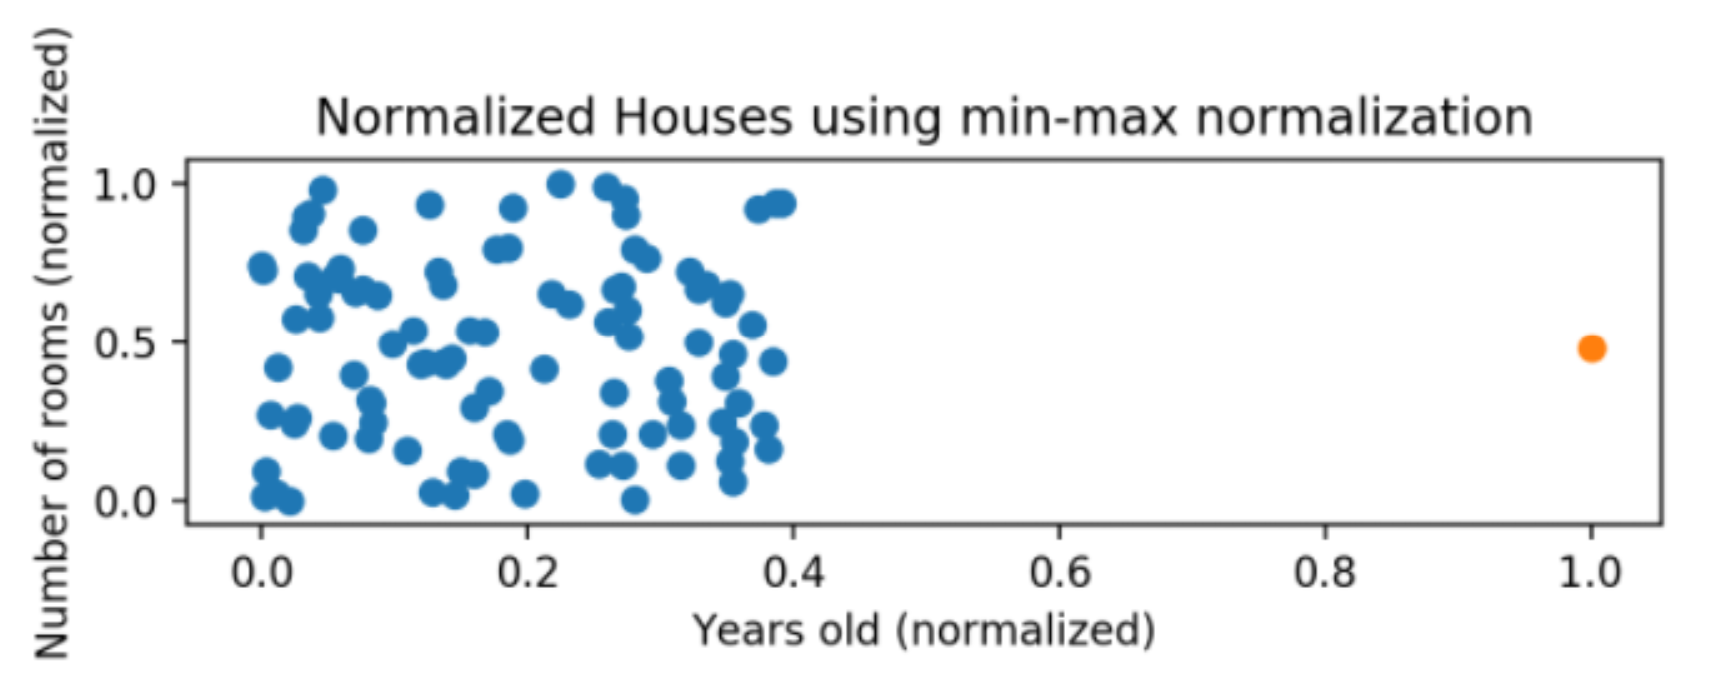

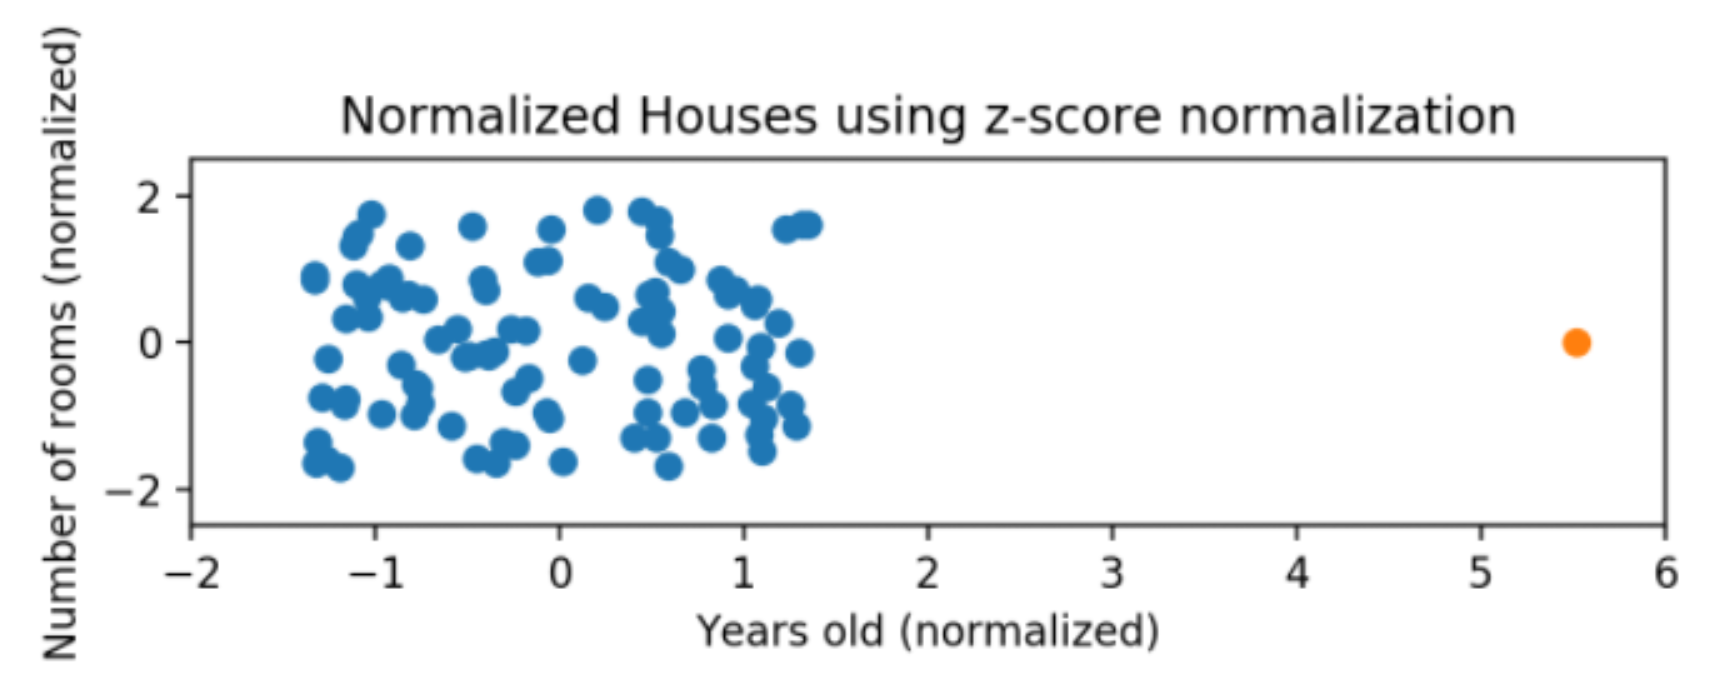

</div>

In [2]:
def min_max_normalization(fileName=None, attribute=None, old_min=None, old_max=None, 
                          new_min=0, new_max=1, single_val=None):
    '''
    :param fileName: filename of csv for normalization
    :param attribute: name of attribute to normalize within file
    :param old_min: minimum value of original data list 
    :param old_max: maximum value of original data list
    :param new_min: new minimum to normalize to
    :param new_max: new maximum to normalize to
    :param single_val: compute only for a single case
    '''

    if single_val is not None:
        return round((single_val-old_min)/(old_max-old_min)*(new_max-new_min)+new_min, 6)

    csv_file = pd.read_csv(fileName)

    pd_attr = pd.DataFrame()
    pd_attr[attr] = csv_file[attr]
    
    pd_attr[attr + '_norm'] = \
        (pd_attr[attr]-pd_attr[attr].min()) \
            / (pd_attr[attr].max() - pd_attr[attr].min()) \
                * (new_max-new_min) + new_min
    
    return pd_attr[attr + '_norm'].tolist()


def zscore_normalization(fileName=None, attribute=None, single_val=None, 
                         mean_val=None, std_val=None):
    '''
    :param fileName: filename of csv to be normalized
    :param attribute: attribute name
    :param single_val: compute using a single value (instead of a file)
    :param mean_val: mean value of the attribute (for single_val compute)
    :param std_val: standard deviation of the attribute (for single val)
    :return: list of z-score normalized values
    not tested with mean absolute deviation
    '''
    if single_val is not None:
        return round((single_val-mean_val)/std_val, 6)

    csv_file = pd.read_csv(fileName)
        
    pd_attr = pd.DataFrame()
    pd_attr[attr] = csv_file[attr]

    attr_list = pd_attr[attr].to_list()
    attr_mean =  mean(attr_list)
    mean_abs_dev = 1/len(attr_list)*sum(np.abs(x-attr_mean) for x in attr_list)
    pd_attr[attr + '_znorm'] = \
        (pd_attr[attr]-attr_mean)/mean_abs_dev

    return pd_attr[attr + '_znorm'].tolist()


### normalization examples

In [3]:
# norm for a single value - min/max
val = min_max_normalization(single_val=83600, old_min=12000, old_max=98000)
assert np.allclose(val, 0.832558)
val

0.832558

In [4]:
# norm for a single value - z-score
val = zscore_normalization(single_val=83600, mean_val=54000, std_val=16000)
assert np.allclose(val, 1.85)
val

1.85

## distances

In [5]:
## numerical dissimilarity/similarity
def manhattan_distance(dataset=None, x=None, y=None):
    """
    :param dataset: two object dataset with numeric attributes
    :param x: list of first object's numeric attributes
    :param y: list of second object's numeric attributes
    :return: manhattan distance
    """
    if dataset is not None:
        x = dataset.iloc[0, :].tolist()
        y = dataset.iloc[1, :].tolist()
    return round(sum(np.abs(a-b) for a, b in zip(x, y)), 4)


def euclidean_distance(dataset=None, x=None, y=None):
    """
    :param dataset: two object dataset with numeric attributes
    :param x: list of first object's numeric attributes
    :param y: list of second object's numeric attributes
    :return: euclidean distance
    """
    if dataset is not None:
        x = dataset.iloc[0, :].tolist()
        y = dataset.iloc[1, :].tolist()
    return round(np.sqrt(sum((a-b)**2 for a, b in zip(x ,y))), 4)


def minkowski_distance(dataset=None, x=None, y=None, p_value=None):
    """generalization of the euclidean and manhattan distances.
    :param dataset: two object dataset with numeric attributes
    :param x: list of first object's numeric attributes
    :param y: list of second object's numeric attributes
    :return: minkowski distance
    """
    if dataset is not None:
        x = dataset.iloc[0, :].tolist()
        y = dataset.iloc[1, :].tolist()
    sum_val = sum(np.abs(a-b)**p_value for a, b in zip(x, y))

    return np.round(sum_val**(1 / p_value), 4)


def hamming_distance(s1, s2):
    """return the Hamming distance b/t equal-length sequences
    """
    if len(s1) != len(s2):
        raise ValueError("undefined for sequences of unequal length")
    result = sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

    return (len(s1) - result) / len(s1)


def simple_matching_distance(list1, list2):
    """
    """
    p = len(list1)
    match = 0
    for i, j in zip(list1, list2):
        if list[i] == list[j]:
            match += 1
    return round((p-match)/p, 4)


def cosine_similarity(x,y):
    numerator = sum(a*b for a, b in zip(x,y))
    sqrtx = round(np.sqrt(sum([a*a for a in x])), 3)
    sqrty = round(np.sqrt(sum([a*a for a in y])), 3)
    denom = sqrtx*sqrty
    result = round(numerator/denom, 4)

    return result


### distances examples

#### manhattan distance

In [30]:
# manhattan distance
result_man_list = manhattan_distance(x=[10, 20, 10], y=[10, 20, 20])
assert np.allclose(10, result_man_list)
print('manhattan distance:', result_man_list)

manhattan distance: 10


#### euclidean distance

In [31]:
# euclidean distance
result_eucl_list = euclidean_distance(x=[0, 3, 4, 5], y=[7, 6, 3, -1])
assert np.allclose(9.7468, result_eucl_list)
print('euclidean distance:', result_eucl_list)

euclidean distance: 9.7468


#### minkowski distance

In [33]:
# minkowski distance using p=2, which is the same as the euclidean distance
result_mink_list = minkowski_distance(x=[0, 3, 4, 5], y=[7, 6, 3, -1], p_value=2)
assert np.allclose(9.7468, result_mink_list)
print('minkowski distance using p=2:', result_mink_list)

minkowski distance using p=2: 9.7468


In [34]:
# minkowski distance using p=3
result_mink_list = minkowski_distance(x=[0, 3, 4, 5], y=[7, 6, 3, -1], p_value=3)
assert np.allclose(8.373, result_mink_list)
print('minkowski distance using p=3:', result_mink_list)

minkowski distance using p=3: 8.373


#### hamming distance

In [38]:
# hamming distance
result = hamming_distance('CATCATCATCATCATCATCTTTTT',
                          'CATCATCTTCATCATCATCTTTTT')
print('hamming distance:', round(result, 4))

hamming distance: 0.9583


In [39]:
# hamming distance 2
result = hamming_distance('ATGCATCATCATCATCATCTTTTT',
                          'CATCATCTTCATCATCATCTTTTT')
print('hamming distance:', round(result, 4))

hamming distance: 0.8333


## dissimilarity/similarity

In [12]:
def dissimilarity_nominal(dataset=None, p=None, m=None, weights=None):
    """computes the dissimilarity b/t two objects (for nominal
    attributes). Can input either a column dataset or directly input
    p and m values.
    :param dataset: pandas dataset to perform dissimiarity analysis
    :param p: total number of attributes describing the objects
    :param m: the number of matches
    :param weights: optional weights array to increase the effect
    of m or to assign greater weight to the matches in attributes
    having a larger number of states
    return: dissimilarity matrix
    only tested for single column
    """
    if dataset is not None:
        dis_mat = np.zeros((len(dataset), (len(dataset))))
        p = len(dataset.columns)
        m = 0
        for i in range(0, len(dis_mat)):
            for j in range(0, len(dis_mat)):
                for col in dataset.columns:
                    if dataset[col].iloc[i] == dataset[col].iloc[j]:
                        m += 1
                dis_mat[i, j] = (p-m)/p
                m = 0
        return dis_mat    
    elif p != None and m != None:
        return round((p-m)/p, 2)


def similarity_nominal(dataset=None, p=None, m=None, weights=None):
    """computes the similarity b/t two objects (for nominal
    attributes). Can input either a column dataset or directly input
    p and m values.
    :param dataset: pandas dataframe to perform similarity analysis
    :param p: total number of attributes describing the objects
    :param m: the number of matches
    :param weights: optional weights array to increase the effect
    of m or to assign greater weight to the matches in attributes
    having a larger number of states
    return: similarity matrix
    only tested for single column
    """
    if dataset is not None:
        dis_mat = dissimilarity_nominal(dataset=dataset, p=p, m=m, 
                                        weights=weights)
        sim_mat = np.subtract(1, dis_mat)
        return sim_mat
    elif p != None and m != None:
        return round(m/p, 2)


def dissimilarity_binary(dataset=None, q=None, r=None, s=None, t=None, 
                         symmetric=True):
    """computes the dissimilarity b/t two objects (for binary
    attributes). Can input either a column dataset or directly input
    q, r, s, t values.
    :param dataset: pandas dataframe to perform dissimilarity analysis
    :param q: number of attributes that equal 1 for both objects i and j
    :param r: nuber of attributes that equal 1 for object i but 0 for j
    :param s: number of attributes that equal 0 for i but 1 for j
    :param t: number of attributes that equal 0 for both i and j
    :param symmetric: True=binary attribute are symmetric; each state is 
    equally valuable. False=asymmetric binary attribute; states are not 
    equally important
    :return: binary dissimilarity
    """
    if dataset is not None:
        dis_mat = np.zeros((len(dataset), (len(dataset))))
        q = 0
        r = 0
        s = 0
        t = 0
        for i in range(0, len(dis_mat)):
            for j in range(0, len(dis_mat)):
                for col in dataset.columns:
                    a = int(dataset[col].iloc[i])
                    b = int(dataset[col].iloc[j])
                    if a == 1 and b == 1:
                        q += 1
                    elif a == 1 and b == 0:
                        r += 1
                    elif a == 0 and b == 1:
                        s += 1
                    elif a == 0 and b == 0:
                        t += 1
                    if symmetric:
                        dis_mat[i, j] = round((r+s)/(q+r+s+t), 2)
                    elif not symmetric:
                        dis_mat[i, j] = round((r+s)/(q+r+s), 2)
                q = 0
                r = 0
                s = 0
                t = 0
        return dis_mat    
    elif q != None and r != None and s != None and t != None:
        if symmetric:
            return round((r+s)/(q+r+s+t), 2)
        elif not symmetric:
            return round((r+s)/(q+r+s), 2)


def dissimilarity_numeric(dataset=None):
    """computes the dissimilarity b/t two objects (for numeric
    attributes). Input a single column dataframe
    :param dataset: pandas dataframe to perform dissimiarity analysis
    :return: dissimilarity matrix
    """
    # normalize the dataset
    dataset = (dataset-dataset.min())/((dataset.max()-dataset.min())*(1-0)+0)
    dataset['copy'] = dataset.values
    
    # use distance measure to find dissimilarity
    dis_mat = np.zeros((len(dataset), (len(dataset))))
    for i in range(0, len(dis_mat)):
        for j in range(0, len(dis_mat)):
            dis_mat[i, j] = euclidean_distance(dataset=None, 
                                               x=[dataset.iloc[i, 0]], 
                                               y=[dataset.iloc[j, 0]])

    return dis_mat


def dissimilarity_ordinal(dataset=None, order={'fair':1, 'good':2, 'excellent':3}):
    """computes the dissimilarity b/t two objects (for ordinal
    attributes). Input a single column dataframe
    :param dataset: pandas dataframe to perform dissimiarity analysis
    :param order: dictionary for rank of ordinal values
    :return: dissimilarity matrix
    """
    # checking for ordinal consistencies
    states = set()
    for obj in dataset.iloc[:, 0]:
        states.add(obj)
    for state in states:
        if state in order:
            continue
        else:
            raise KeyError(f'no ordinal value {state}')

    # step 1: replace each ordinal value with its rank
    dataset = dataset.iloc[:, 0].replace(order).to_frame()

    # step 2 & 3: normalize the dataset and use distance measure 
    # to find dissimilarity
    dis_mat = dissimilarity_numeric(dataset=dataset)

    return dis_mat


def dissimilarity_mixed(dataset=None, types=None, order=None, symmetric=None):
    """used when the dataframe includes mixed attributes
    :param dataset: dataframe for dissimilarity analysis
    :param types: dictionary of attribute types based on column names
    :param order: order for ordinal types (currently only one set)
    :param symmetric: symmetric/asymmetric for binary types (currently for 1 set)
    :return: mixed dissimilarity matrix
    in work; does not account for null values
    """
    # print(types['test1_nom'])
    dis_mats = []
    for col in enumerate(dataset.columns):
        if types[col[1]] == 'nominal':
            dis_mats.append(dissimilarity_nominal(dataset=dataset[[col[1]]]))
        elif types[col[1]] == 'ordinal':
            dis_mats.append(dissimilarity_ordinal(dataset=dataset[[col[1]]], 
                                                  order=order))
        elif types[col[1]] == 'numeric':
            dis_mats.append(dissimilarity_numeric(dataset=dataset[[col[1]]]))
        elif types[col[1]] == 'binary':
            dis_mats.append(dissimilarity_binary(dataset=dataset[[col[1]]], 
                                                 symmetric=symmetric))

    dis_mat = np.zeros((len(dataset), len(dataset)))
    for array in dis_mats:
        dis_mat += array
    dis_mat /= len(types)

    return dis_mat

### dissimilarity/similarity examples

#### nominal dissimilarity

In [46]:
## nominal dissimilarity

df_mixed = pd.read_csv('datasets/mixed_sample.csv', index_col=0)
print('mixed dataset:\n', df_mixed)
df_nominal = df_mixed[['test1_nom']]
dis_mat_nom = dissimilarity_nominal(dataset=df_nominal, 
                                    p=None, m=None, weights=None)
print('\ntest1_nom attribute dissimilarity matrix:')
print(dis_mat_nom)
# [[0. 1. 1. 0.]
# [1. 0. 1. 1.]
# [1. 1. 0. 1.]
# [0. 1. 1. 0.]]

mixed dataset:
   test1_nom  test2_ord  test3_num
0    code A  excellent         45
1    code B       fair         22
2    code C       good         64
3    code A  excellent         28

test1_nom attribute dissimilarity matrix:
[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]]


#### nominal similarity

In [48]:
## nominal similarity

sim_mat_nom = similarity_nominal(dataset=df_nominal, 
                                 p=None, m=None, weights=None)
print('test1_nom attribute similarity matrix:')
print(sim_mat_nom)
# [[1. 0. 0. 1.]
# [0. 1. 0. 0.]
# [0. 0. 1. 0.]
# [1. 0. 0. 1.]]

test1_nom attribute similarity matrix:
[[1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]]


#### binary dissimilarity/similarity

In [51]:
## converting to binary values

df_binary = pd.read_csv('datasets/binary_sample.csv', index_col=0)

# convert feature to binary values
for i in range(0, len(df_binary)):
    for j in range(0, len(df_binary.columns)):
        if df_binary.iloc[i, j] in ['Y', 'P']:
            df_binary.iloc[i, j] = 1
        elif df_binary.iloc[i, j] == 'N':
            df_binary.iloc[i, j] = 0
print('converted binary dataset\n')
print(df_binary)

converted binary dataset

   name gender fever cough test1 test2 test3 test4
0  Jack      M     1     0     1     0     0     0
1   Jim      M     1     1     0     0     0     0
2  Mary      F     1     0     1     0     1     0


In [54]:
# computing dissimilarity/similarity
# get list of asymmetric attributes
df_binary_asym = df_binary[['fever', 'cough', 'test1', 'test2', 
                            'test3', 'test4']]
dis_mat_bin = dissimilarity_binary(dataset=df_binary_asym, q=None, r=None, 
                               s=None, t=None, symmetric=False)
print('binary dissimiarlity matrix')
print(dis_mat_bin)
# [[0.   0.67 0.33]
# [0.67 0.   0.75]
# [0.33 0.75 0.  ]]

# computing similarity
sim_mat_bin = 1 - dis_mat_bin
print('\nbinary simiarlity matrix')
print(sim_mat_bin)
# [[1.   0.33 0.67]
# [0.33 1.   0.25]
# [0.67 0.25 1.  ]]

binary dissimiarlity matrix
[[0.   0.67 0.33]
 [0.67 0.   0.75]
 [0.33 0.75 0.  ]]

binary simiarlity matrix
[[1.   0.33 0.67]
 [0.33 1.   0.25]
 [0.67 0.25 1.  ]]


In [17]:
# manually computing dissimilarity using q, r, s, t
dis_val_bin = dissimilarity_binary(dataset=None, q=1, r=1, s=1, t=1, symmetric=False)
print(dis_val_bin) # 0.67

# manually computing dissimilarity using q, r, s, t
dis_val_bin = dissimilarity_binary(dataset=None, q=1, r=1, s=2, t=0, symmetric=False)
print(dis_val_bin) # 0.75

0.67
0.75


#### mixed samples

In [18]:
# testing on a mixed dataset

# numeric
dataset = pd.read_csv('datasets/mixed_sample.csv', index_col=0)
dataset = dataset[['test3_num']]
result_eucl_mixedsample = dissimilarity_numeric(dataset=dataset)
print('numeric attribute:')
print(result_eucl_mixedsample)
# [[0.     0.5476 0.4524 0.4048]
# [0.5476 0.     1.     0.1429]
# [0.4524 1.     0.     0.8571]
# [0.4048 0.1429 0.8571 0.    ]]


# ordinal
df_mixed = pd.read_csv('datasets/mixed_sample.csv', index_col=0)
df_ordinal = df_mixed[['test2_ord']]
dis_mat_ord = dissimilarity_ordinal(dataset=df_ordinal, 
                                order={'fair':1, 'good':2, 'excellent':3})
print('\nordinal attribute (dissimilarity):')
print(dis_mat_ord)
# [[0.  1.  0.5 0. ]
# [1.  0.  0.5 1. ]
# [0.5 0.5 0.  0.5]
# [0.  1.  0.5 0. ]]

sim_mat_ord = 1 - dis_mat_ord
print('\nordinal attribute (similarity):')
print(sim_mat_ord)
# [[1.  0.  0.5 1. ]
# [0.  1.  0.5 0. ]
# [0.5 0.5 1.  0.5]
# [1.  0.  0.5 1. ]]


# mixed dissimilarity
dataset = pd.read_csv('datasets/mixed_sample.csv', index_col=0)
types = {'test1_nom':'nominal', 'test2_ord':'ordinal', 'test3_num':'numeric'}
order = {'fair':1, 'good':2, 'excellent':3}
dis_mixed = dissimilarity_mixed(dataset=dataset, types=types, order=order, symmetric=False)
print('\nmixed attribute (dissimilarity):')
print(dis_mixed)
# [[0.         0.8492     0.6508     0.13493333]
# [0.8492     0.         0.83333333 0.7143    ]
# [0.6508     0.83333333 0.         0.7857    ]
# [0.13493333 0.7143     0.7857     0.        ]]

numeric attribute:
[[0.     0.5476 0.4524 0.4048]
 [0.5476 0.     1.     0.1429]
 [0.4524 1.     0.     0.8571]
 [0.4048 0.1429 0.8571 0.    ]]

ordinal attribute (dissimilarity):
[[0.  1.  0.5 0. ]
 [1.  0.  0.5 1. ]
 [0.5 0.5 0.  0.5]
 [0.  1.  0.5 0. ]]

ordinal attribute (similarity):
[[1.  0.  0.5 1. ]
 [0.  1.  0.5 0. ]
 [0.5 0.5 1.  0.5]
 [1.  0.  0.5 1. ]]

mixed attribute (dissimilarity):
[[0.         0.8492     0.6508     0.13493333]
 [0.8492     0.         0.83333333 0.7143    ]
 [0.6508     0.83333333 0.         0.7857    ]
 [0.13493333 0.7143     0.7857     0.        ]]


## data preprocessing

In [19]:
def mean(datalist):
    return sum(datalist)/len(datalist)


def chi_squared(df):
    """computes the correlation relationship b/t two nominal attributes
    :param df: pandas dataframe with the observed frequency (actual count)
    contingency table
    :return chi2: chi squared value
    :return dof: degrees of freedom for the given table (for chi2 distribution lookup)
    """

    df['sum_row'] = df.sum(axis=1)
    df.loc["sum_col"] = df.sum()
    nrow = len(df)-1
    ncol = len(df.columns)-1

    e = np.zeros(shape=(nrow, ncol))
    chi2 = 0
    for ii in range(0, nrow):
        for jj in range(0, ncol):
            # i,j expectancy value
            e[ii, jj] = (df['sum_row'][ii]*df.loc['sum_col'][jj]) / df.loc['sum_col', 'sum_row']
            # chi squared value summation
            chi2 += (df.iloc[ii, jj]-e[ii, jj])**2 / e[ii, jj]
    # print(e)
    # print(chi2)
    dof = (nrow-1)*(ncol-1)

    return chi2, dof


def correlation(df=None, fn1=None, fn2=None, attr1=None, attr2=None):
    """correlation coefficient for numeric evaluation of the correlation 
    between two attributes
    :param df: pandas dataframe containing the two numerical attributes and
    objects
    :param fn1: optional csv file input to be used as first attribute dataset
    :param fn2: optional csv file input to be used as second attr. dataset
    :param attr1: name of attribute to analyze for first file
    :param attr2: name of attribute to analyze for second file
    :return corr: correlation coefficient
    """
    if df is None:
        data1 = pd.read_csv(fn1)
        data2 = pd.read_csv(fn2)
        a = data1[attr1].tolist()
        b = data2[attr2].tolist()
        stddeva = data1[attr1].std()
        stddevb = data2[attr2].std()
    else:
        a = df.iloc[:, 0].tolist()
        b = df.iloc[:, 1].tolist()
        stddeva = df.iloc[:, 0].std()
        stddevb = df.iloc[:, 1].std()

    A = mean(a)
    B = mean(b)
    N = len(a)
    corr = sum((x-A)*(y-B) for x, y in zip(a, b))/(N*stddeva*stddevb)
#     corr = (sum((x*y) for x, y in zip(a, b))-N*A*B)/(N*stddeva*stddevb)    
#     corr = data1[attr1].corr(data2[attr2])

    return round(corr, 6)


def covariance(df=None, fn1=None, fn2=None, attr1=None, attr2=None):
    """covariance for numeric evaluation of the correlation between two 
    attributes
    :param df: pandas dataframe containing the two numerical attributes and
    objects
    :param fn1: optional csv file input to be used as dataset for first attr. 
    :param fn2: optional csv file input to be used as dataset for second attr.
    :param attr1: name of attribute to analyze for first file
    :param attr2: name of attribute to analyze for second file
    :return corr: correlation coefficient
    """
    if df is None:
        data1 = pd.read_csv(fn1)
        data2 = pd.read_csv(fn2)
        a = data1[attr1].tolist()
        b = data2[attr2].tolist()
    else:
        a = df.iloc[:, 0].tolist()
        b = df.iloc[:, 1].tolist()

    A = mean(a)
    B = mean(b)
    N = len(a)

    return sum((x-A)*(y-B) for x, y in zip(a, b))/(N)


def support(df, arg1, arg2):
    """
    """
    df['sum_row'] = df.sum(axis=1)
    df.loc["sum_col"] = df.sum()
    nrow = len(df)-1
    ncol = len(df.columns)-1
    try:
        return df.loc[arg1, arg2] / df.loc['sum_col', 'sum_row']
    except KeyError:
        return df.loc[arg2, arg1] / df.loc['sum_col', 'sum_row']


def confidence(df, arg1, arg2):
    """
    """
    df['sum_row'] = df.sum(axis=1)
    df.loc["sum_col"] = df.sum()
    nrow = len(df)-1
    ncol = len(df.columns)-1

    try:
        return df.loc[arg1, arg2] / df.loc[arg1, 'sum_row']
    except KeyError:
        return df.loc[arg2, arg1] / df.loc['sum_col', arg1]


def lift(df, arg1, arg2):
    """
    """
    df['sum_row'] = df.sum(axis=1)
    df.loc["sum_col"] = df.sum()
    nrow = len(df)-1
    ncol = len(df.columns)-1
    total = df.loc['sum_col', 'sum_row']
    # lift = P(AandB)/(P(A)*P(B)) = support(AandB)/(P(A)*P(B))
    try:
        return df.loc[arg1, arg2] / (df.loc[arg1, 'sum_row']*df.loc['sum_col', arg2])*total
    except KeyError:
        return df.loc[arg2, arg1] / (df.loc['sum_col', arg1]*df.loc[arg2, 'sum_row'])*total


### data preprocessing examples

#### example 1 - chi2 test

In [58]:
df_chi2 = pd.DataFrame(index=['LikeSciFi', 'NotLikeSciFi'], 
                     columns=['PlayChess', 'NotPlayChess'])

df_chi2.loc['LikeSciFi', 'PlayChess'] = 250
df_chi2.loc['NotLikeSciFi', 'PlayChess'] = 50
df_chi2.loc['LikeSciFi', 'NotPlayChess'] = 200
df_chi2.loc['NotLikeSciFi', 'NotPlayChess'] = 1000

print('contingency table:\n\n', df_chi2)
chi2, dof = chi_squared(df_chi2)
assert np.allclose(chi2, 507.93650)
print('\nchi2 value:', chi2)
print('degrees of freedom:', dof)
# DOF = (r-1)(c-1) = 1 -> chi2 to reject at 0.001 = 10.828

contingency table:

              PlayChess NotPlayChess
LikeSciFi          250          200
NotLikeSciFi        50         1000

chi2 value: 507.93650793650795
degrees of freedom: 1


#### example 2 - correlation

In [59]:
# example 2 - correlation test
df = pd.read_csv('datasets/correlation_sample.csv', index_col=0)
cov = covariance(df)
assert np.allclose(cov, 7.0)

#### support, confidence, lift

In [70]:
# example 3 - support and confidence
df_sup = pd.DataFrame(index=[     'LikeSki',      'NotLikeSki'], 
                    columns=['PlayFootball', 'NotPlayFootball'])

df_sup.loc['LikeSki', 'PlayFootball'] = 1700
df_sup.loc['NotLikeSki', 'PlayFootball'] = 400
df_sup.loc['LikeSki', 'NotPlayFootball'] = 800
df_sup.loc['NotLikeSki', 'NotPlayFootball'] = 1000
print('Contingency table:')
print(df_sup)

# LikeSki -> PlayFootball
sup = support(df_sup.copy(), 'LikeSki', 'PlayFootball')
assert np.allclose(sup, 0.435897435)

conf = confidence(df_sup.copy(), 'LikeSki', 'PlayFootball')
assert np.allclose(conf, 0.68)

lft = lift(df_sup.copy(), 'LikeSki', 'PlayFootball')
assert np.allclose(lft, 1.2628571428571)

print('\nsupport:', round(sup, 4))
print('confidence:', conf)
print('lift:', round(lft, 4))

Contingency table:
           PlayFootball NotPlayFootball
LikeSki            1700             800
NotLikeSki          400            1000

support: 0.4359
confidence: 0.68
lift: 1.2629


#### lift and chi2 test example 2

In [74]:
# example 6d - lift
df_sup = pd.DataFrame(index=['C', 'NotC'], 
                    columns=['B', 'NotB'])
df_sup.loc['C', 'B'] = 400
df_sup.loc['NotC', 'B'] = 200
df_sup.loc['C', 'NotB'] = 350
df_sup.loc['NotC', 'NotB'] = 50
# B -> C
lft1 = lift(df_sup.copy(), 'B', 'C')
assert np.allclose(lft1, 0.888, rtol=1e-2)
lft2 = lift(df_sup.copy(), 'B', 'NotC')
assert np.allclose(lft2, 1.33, rtol=1e-2)
print('lift (B, C):', round(lft1, 4))
print('lift (B, not C):', round(lft2, 4))

# example 6d - chi2 test 2
chi2, dof = chi_squared(df_sup)
assert np.allclose(chi2, 55.56, rtol=1e-2)
print('chi2:', round(chi2, 4), 'dof:', dof)
# DOF = (r-1)(c-1) = 1 -> chi2 to reject at 0.001 = 10.828

lift (B, C): 0.8889
lift (B, not C): 1.3333
chi2: 55.5556 dof: 1


#### support, confidence, lift test example 3

In [75]:
# example 6d - support and confidence and lift
df_sup = pd.DataFrame(index=['Coffee', 'NotCoffee'], 
                    columns=['Tea', 'NotTea'])
df_sup.loc['Coffee', 'Tea'] = 150
df_sup.loc['NotCoffee', 'Tea'] = 50
df_sup.loc['Coffee', 'NotTea'] = 750
df_sup.loc['NotCoffee', 'NotTea'] = 50
# Tea -> Coffee
sup = support(df_sup.copy(), 'Tea', 'Coffee')
assert np.allclose(sup, 0.15)
conf = confidence(df_sup.copy(), 'Tea', 'Coffee')
assert np.allclose(conf, 0.75, rtol=1e-2)
lft = lift(df_sup.copy(), 'Tea', 'Coffee')
assert np.allclose(lft, 0.833, rtol=1e-2)
print('support:', sup)
print('confidence:', conf)
print('lift:', lft)

support: 0.15
confidence: 0.75
lift: 0.8333333333333334


#### lift vs chi2 comparisons 1

In [76]:
# example 6d - lift vs chi2
df_sup = pd.DataFrame(index=['cereal', 'Notcereal'], 
                    columns=['basketball', 'Notbasketball'])
df_sup.loc['cereal', 'basketball'] = 2000
df_sup.loc['Notcereal', 'basketball'] = 1000
df_sup.loc['cereal', 'Notbasketball'] = 1750
df_sup.loc['Notcereal', 'Notbasketball'] = 250
# cereal -> basketball
lft1 = lift(df_sup.copy(), 'cereal', 'basketball')
assert np.allclose(lft1, 0.89, rtol=1e-2) # negatively corr.
lft2 = lift(df_sup.copy(), 'basketball', 'Notcereal')
assert np.allclose(lft2, 1.33, rtol=1e-2) # positively corr.
chi2, dof = chi_squared(df_sup)
assert np.allclose(chi2, 277.78, rtol=1e-2) # corr. since > 10.828

print('lift (cereal, basketball):', lft1)
print('lift (basketball, notcereal):', lft2)
print('lift:', chi2)


lift (cereal, basketball): 0.888888888888889
lift (basketball, notcereal): 1.3333333333333335
lift: 277.77777777777777


#### lift vs chi2 comparisons 2

In [77]:
## LIFT AND CHI2
df_sup = pd.DataFrame(index=['bread', 'Notbread'], 
                    columns=['orange', 'Notorange'])
df_sup.loc['bread', 'orange'] = 900
df_sup.loc['Notbread', 'orange'] = 450
df_sup.loc['bread', 'Notorange'] = 750
df_sup.loc['Notbread', 'Notorange'] = 900
# bread -> orange
lft = lift(df_sup.copy(), 'bread', 'orange')
# lft = lift(df_sup.copy(), 'orange', 'Notbread')
chi2, dof = chi_squared(df_sup)
print('lift:', lft)
print('chi2:', chi2)

lift: 1.2121212121212122
chi2: 134.9862258953168
